lesson -> key points -> deeper dive with examples
decision tree:   nodes lead to splits and then at teh very bottom: leafs

define - fit a model - make predictions - validate our model

a. while defining you wanna think which model is best suited for my task
b. fitting is the same as training - taking the defined model and applying it to our dataset and asking it to pull underlying patterns
c. perdict is generalizingit or apply it to data it has never seen before

Example of a decision tree model on housing prices in Melbourne

Basic data exploration - pandas (a library for data analysis and manipulation)
A DataFrame in Python is a two-dimensional, labeled data structure commonly used for handling and analyzing structured data. It comes from the Pandas library, which is built on top of NumPy.


In [14]:
import kagglehub
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("ronikmalhotra/melbourne-housing-dataset")

pathtofile = r"/Users/arana/.cache/kagglehub/datasets/ronikmalhotra/melbourne-housing-dataset/versions/1/Melbourne_housing.csv"
# print("Path to dataset files:", path)
#read into csv

housingdata = pd.read_csv(path+'/Melbourne_housing.csv')
housingdata.shape

/var/folders/w9/spn366751dd808wbdcll3ngc0000gn/T/ipykernel_1131/1334674297.py:10: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  housingdata = pd.read_csv(path+'/Melbourne_housing.csv')


(34857, 22)

In [15]:
housingdata.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Latitude', 'Longtitude',
       'Regionname', 'Propertycount', 'ParkingArea', 'Price'],
      dtype='object')

In [16]:
housingdata.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,1.0,1.0,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,2.0,1.0,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,1.0,0.0,120.0,82,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,1.0,0.0,159.0,inf,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,2.0,1.0,174.0,122,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN


In [17]:
#look for missing data

housingdata.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21097
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Regionname           0
Propertycount        3
ParkingArea          0
Price             7610
dtype: int64

In [18]:
#a table of summary values

housingdata.describe()

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount,Price
count,34857.000000,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,15551.000000,26881.000000,26881.000000,34854.000000,2.724700e+04
mean,3.031012,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,1965.289885,-37.810634,145.001851,7572.888306,1.050173e+06
std,0.969933,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,37.328178,0.090279,0.120169,4428.090313,6.414671e+05
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.190430,144.423790,83.000000,8.500000e+04
25%,2.000000,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,1940.000000,-37.862950,144.933500,4385.000000,6.350000e+05
50%,3.000000,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,1970.000000,-37.807600,145.007800,6763.000000,8.700000e+05
75%,4.000000,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,2000.000000,-37.754100,145.071900,10412.000000,1.295000e+06
max,16.000000,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,2106.000000,-37.390200,145.526350,21650.000000,1.120000e+07


what is a prediction target?  our output, the thing we are trying to predict.

features: all teh variables taht can be contributing to our prediction

y = pancakes.rating
x will have features : flours, bp, milk, salt, sugar etc
build model using scikit learn
define it, fit it/train it




In [19]:
# y = housingdata.Price
# Drop rows where Price is NaN
housingdata = housingdata.dropna(subset=['Price'])
y = housingdata.Price
y.head()

1     840000.0
2    1275000.0
3    1455000.0
5    2000000.0
6    1110000.0
Name: Price, dtype: float64

In [20]:
#create a list of your features
chosen_column_features = ['Rooms', 'Bathroom', 'Landsize', 'Latitude', 'Longtitude']
#take X as a suset of the data that only has those columns
X = housingdata[chosen_column_features]
X.describe()

,Rooms,Bathroom,Landsize,Latitude,Longtitude
count,27247.000000,20800.000000,17982.000000,20993.000000,20993.000000
mean,2.992293,1.591683,593.488933,-37.806963,144.996711
std,0.954795,0.700880,3757.266429,0.091619,0.120680
min,1.000000,0.000000,0.000000,-38.190430,144.423790
25%,2.000000,1.000000,219.000000,-37.860900,144.925300
50%,3.000000,1.000000,512.000000,-37.800460,145.003200
75%,4.000000,2.000000,664.000000,-37.748970,145.068770
max,16.000000,9.000000,433014.000000,-37.397800,145.526350


In [21]:
from sklearn.tree import DecisionTreeClassifier  # For classification
from sklearn.model_selection import train_test_split

#create a new untrained model
housing_model = DecisionTreeClassifier(random_state=1)

#training based on our features
housing_model.fit(X,y)

DecisionTreeClassifier(random_state=1)

In [22]:
print(X.head())
print("\nprices predicted for first 5 rows are:-------")
print(housing_model.predict(X.head()))

   Rooms  Bathroom  Landsize  Latitude  Longtitude
1      3       2.0     303.0  -37.7180    144.8780
2      2       1.0     120.0  -37.8459    144.9555
3      2       1.0     159.0  -37.8450    144.9538
5      4       2.0     853.0  -37.7707    145.0318
6      3       2.0     208.0  -37.7854    145.0325

prices predicted for first 5 rows are:-------
[ 840000. 1275000. 1455000. 2000000. 1110000.]


In [23]:
y.head()
# reason these prices are same as the model prediction is coz WE TRAINED ON THE VERY values, look at the predixt line, the model already saw this exact first 5 rows

1     840000.0
2    1275000.0
3    1455000.0
5    2000000.0
6    1110000.0
Name: Price, dtype: float64

#model validation
#is our model any good? does our model accurately predict what we are trying to predict
#predictions matched the target values, we did training and then did predictions on the exact same dataset, you get 100% results, hence we need to set aside VALIDATION DATA

#WHAT IS MEAN ABSOLUTE ERROR? QUANTIFY HOW MUCH IS OUR MODEL OFF BY


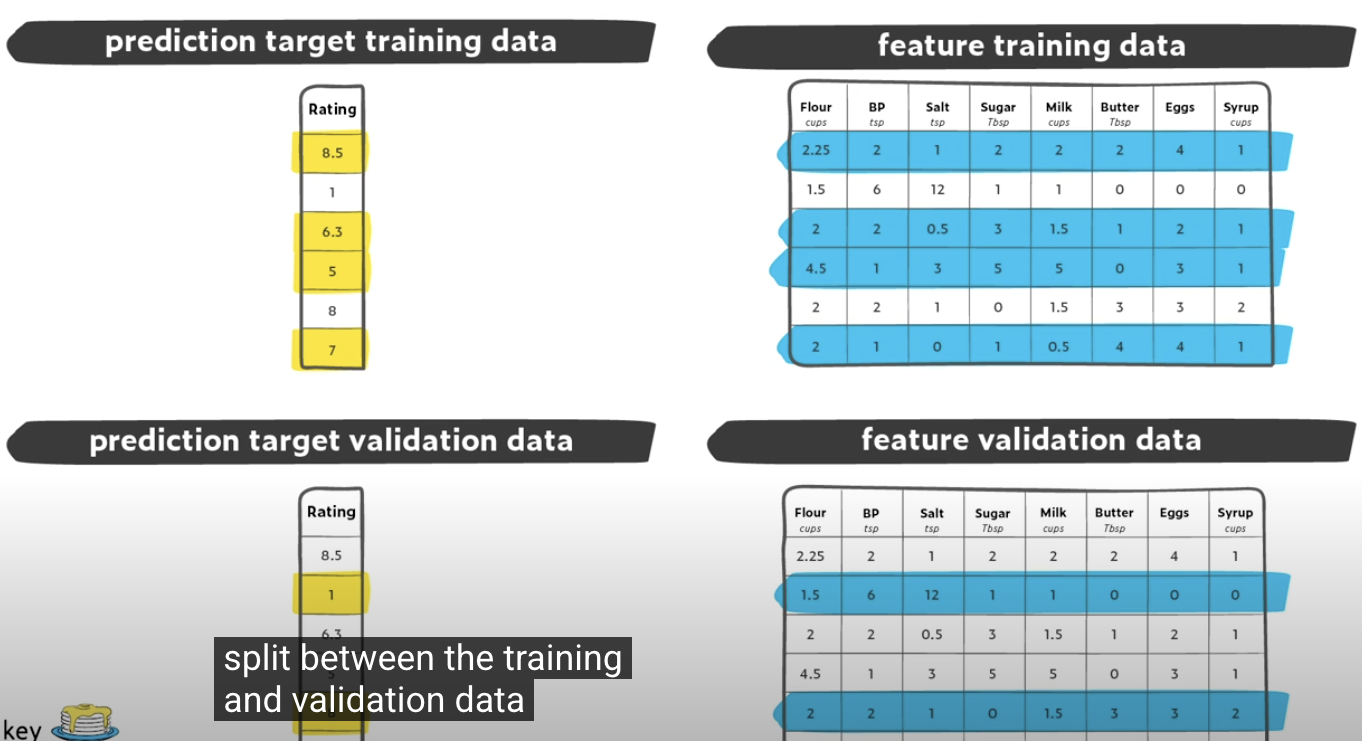 

DURING TRAINING IT USES ONLY TRAINING DATA

mae IS given by

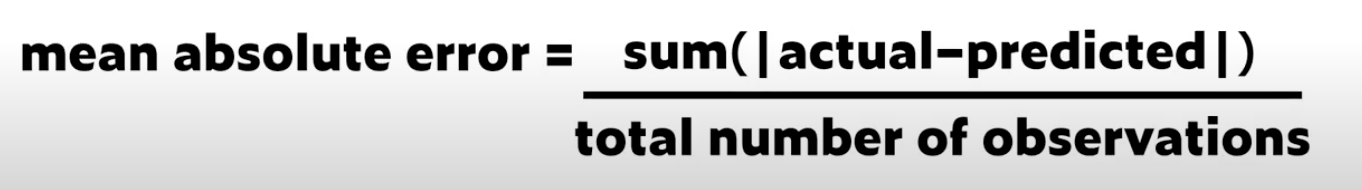

In [24]:
from sklearn.model_selection import train_test_split

def mean_absolute_error(y_true, y_pred):
    """
    Calculate Mean Absolute Error (MAE).

    Parameters:
    y_true : list or numpy array of true values
    y_pred : list or numpy array of predicted values

    Returns:
    mae : float, mean absolute error
    """
    # Ensure both lists/arrays are the same length
    if len(y_true) != len(y_pred):
        raise ValueError("Lengths of y_true and y_pred must be equal")

    # Compute absolute errors
    absolute_errors = [abs(t - p) for t, p in zip(y_true, y_pred)]
    
    # Return mean
    mae = sum(absolute_errors) / len(absolute_errors)
    return mae


#split data into training and validation for both the features and the target ccolumn
#split is based on a randm num generator

train_X , validation_X, train_y, validation_y = train_test_split(X, y, random_state=0)

#define model

housing_model_with_split = DecisionTreeClassifier()

#train or fit the model

housing_model_with_split.fit(train_X, train_y)

#get predictions on validation set

predictions = housing_model_with_split.predict(validation_X)
print("MAE: ", mean_absolute_error(validation_y,predictions) )

#the mAE is now a lot higher than what is was ~4k when we did not split the data


MAE:  265094.5518203171


Underfitting

Imagine you’re trying to teach a child how to recognize cats vs. dogs.
If the child only learns “cats are small” and “dogs are big”, they’ll do poorly, because that rule is too simple.
They’ll misclassify a big cat (like a Maine Coon) as a dog, or a small dog (like a Chihuahua) as a cat.
That’s underfitting:

The model is too simple.
It doesn’t learn enough from the training data.
It performs poorly on both the training data and new unseen data.

Overfitting

Now imagine the child memorizes every tiny detail:
“This exact cat has a black spot on its left ear.”
“This dog always wears a red collar.”
They’ll ace the test with the same animals (training data).
But when shown a new cat or dog, they get confused—because they relied on memorization instead of general rules.

That’s overfitting:

The model is too complex.
It fits the training data perfectly, even the noise or irrelevant details.
It does well on training data but badly on new/unseen data.

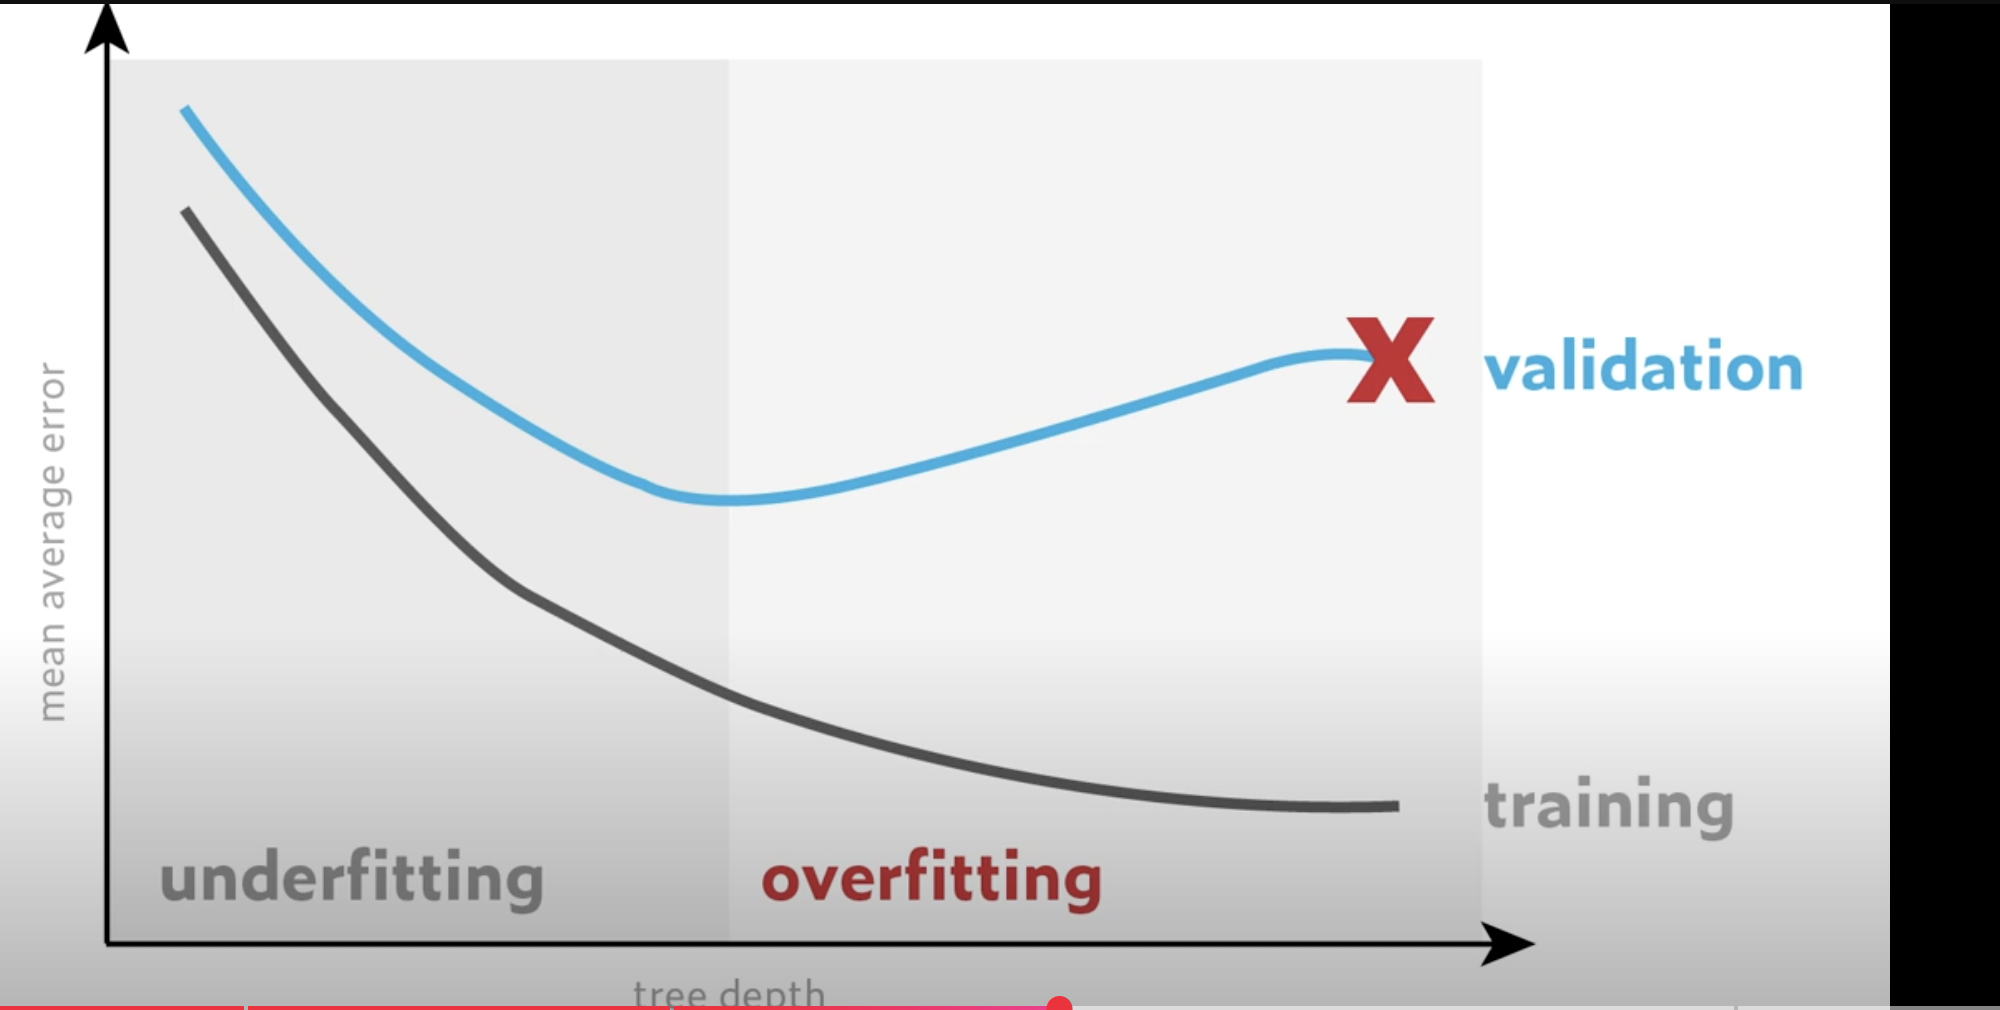

#maximize number of leaf nodes in our decision trees. --> we are trying to overfit
#having only a small number of leaf nodes will only do very geenric useless housing price predictions

so tehre is a sweet spot
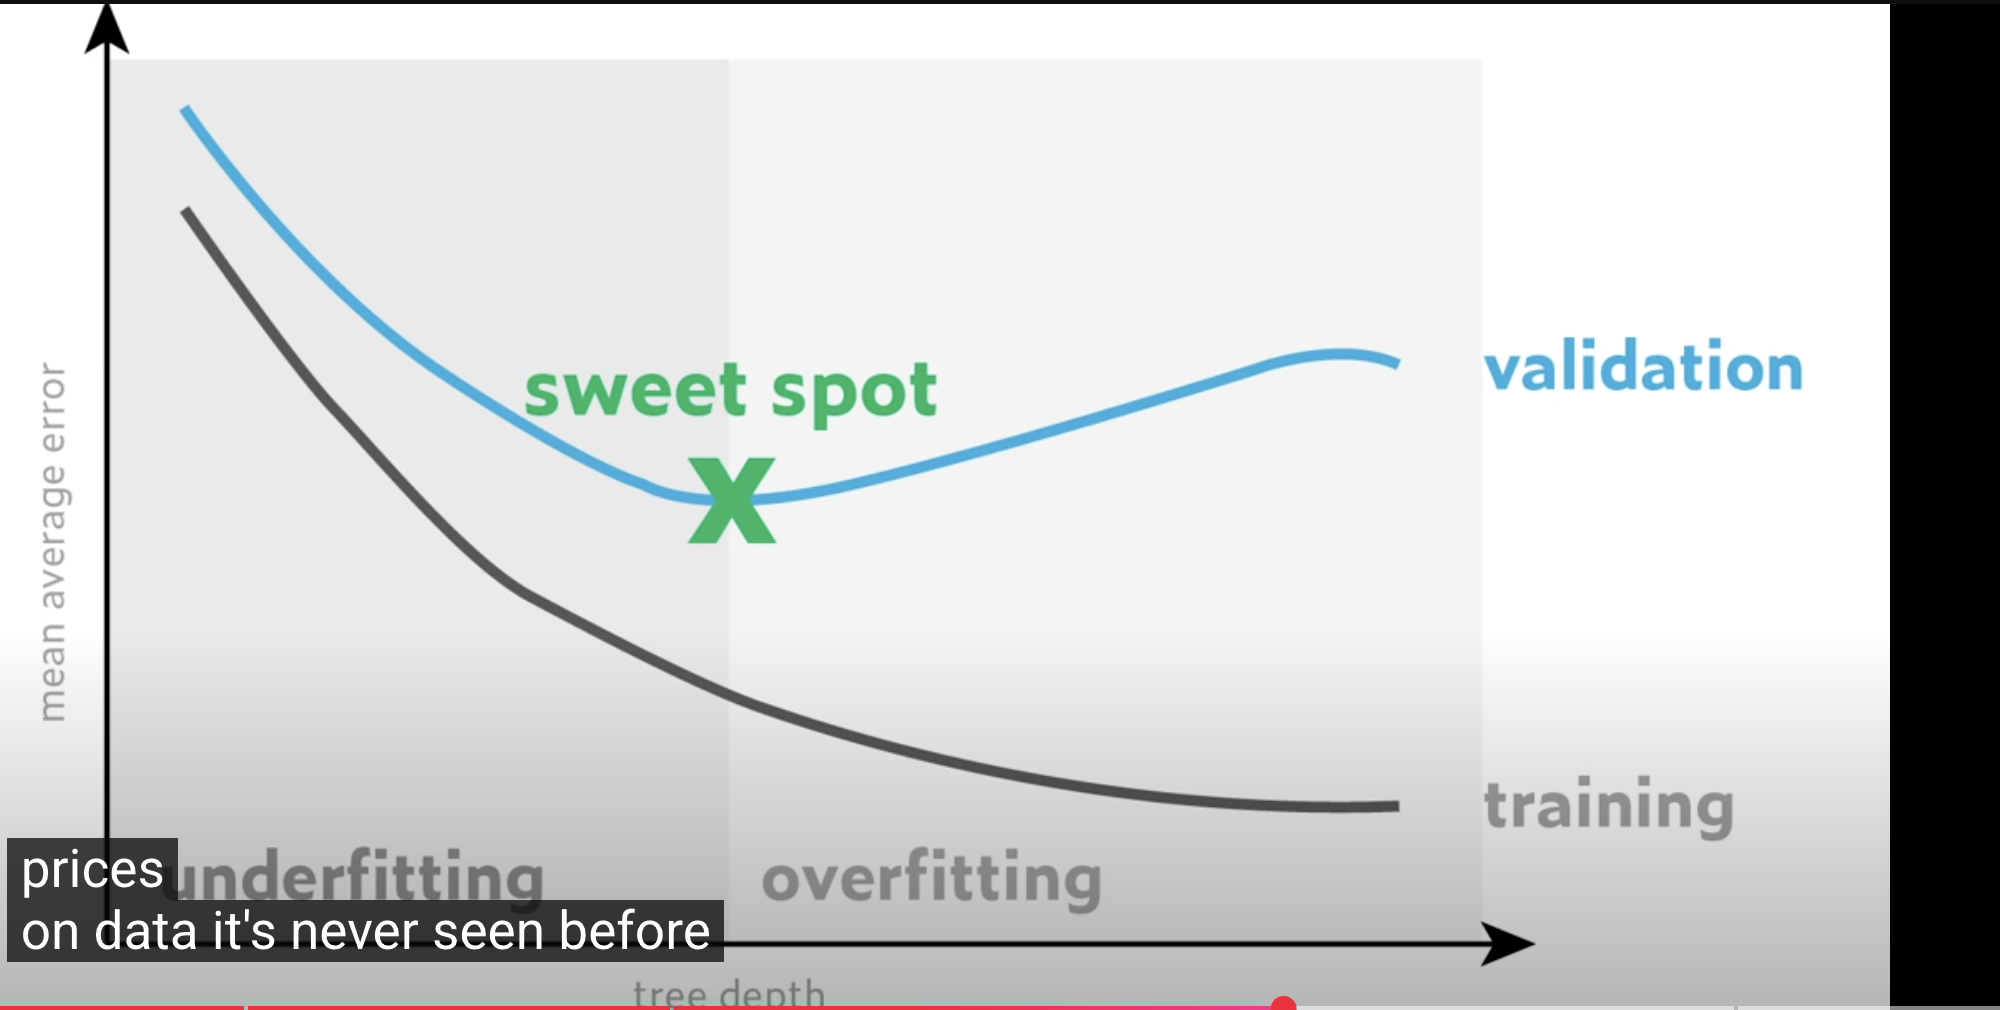

#altering MAE with a varying number of leaf nodes in the model
#it can decrease as nodes go up, and after a point you will see it increase due to overfitting


RANDOM FORESTS
Think of a random forest like asking a group of friends to help you make a decision, instead of asking just one person.

Decision Trees as base learners
A single decision tree is like one friend giving you advice based on their experience.
For example, if predicting house prices, a tree might split on features like:
“Is the number of rooms > 3?”
“Is the location in downtown?”
“Is land size > 500m²?”

Each path ends in a prediction.
Problem: a single tree is unstable — small changes in data can completely change it (high variance).

Random Forest = many decision trees

The algorithm creates many decision trees (hundreds or thousands).
Each tree is trained on a random subset of the data (bootstrap sampling).
At each split, it considers a random subset of features instead of all.
This randomness decorrelates the trees and reduces overfitting.

Prediction

For regression → average of all tree predictions.
For classification → majority vote from all trees.

👉 So, a random forest is basically “wisdom of the crowd” applied to decision trees.



In [ ]:
#define model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
forest_model = RandomForestRegressor(random_state = 1)

#fitting
forest_model.fit(train_X,train_y)

#make predictions
forest_predictions = forest_model.predict(validation_X)

print('MAE from forests: ', mean_absolute_error(validation_y, forest_predictions))

#what one decision tree had 
print("MAE from a D TRee: ", mean_absolute_error(validation_y,predictions) )

#it has already improved, better accuracy with a forest

MAE from forests:  207906.92707459818
MAE from a D TRee:  265094.5518203171
